<a href="https://colab.research.google.com/github/rittikarijhwani/ML-lab-sem7/blob/main/exp_3_simple_linear_regression_(github).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ready

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('LRdataset.csv')
print(dataset.shape)
dataset.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
#initializing our inputs and outputs
X = dataset['Head Size(cm^3)'].values
Y = dataset['Brain Weight(grams)'].values

#mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

#total number of values
n = len(X)

In [4]:
#using the formula to calculate the b1 and b0
numerator = 0
denominator = 0

#for loop is basically summation
#calculating numerator and denominator separately as can't do fractions in code
for i in range(n):
    numerator = numerator + (X[i] - x_mean) * (Y[i] - y_mean)
    denominator = denominator + (X[i] - x_mean) ** 2

b1 = numerator / denominator #slope
b0 = y_mean - (b1 * x_mean) # y intercept

print(f"b1: {b1}")
print(f"b0: {b0}")

b1: 0.26342933948939945
b0: 325.57342104944223


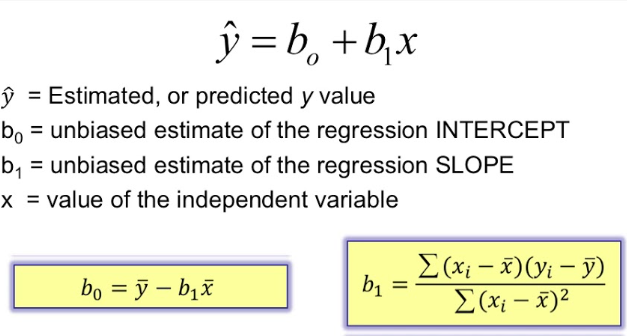

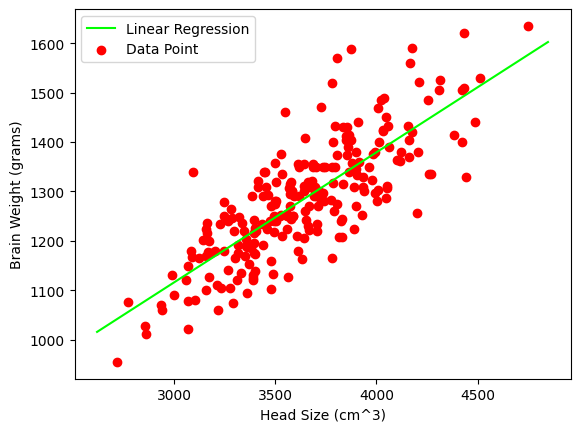

In [5]:
#plotting values

#creating buffer to ensure all points are visible
x_max = np.max(X) + 100
x_min = np.min(X) - 100

#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000) #creating x axis
y = b0 + b1 * x #getting LR line using formula (green line)

#plotting line
plt.plot(x, y, color='#00ff00', label='Linear Regression')

#plotting the data points
plt.scatter(X, Y, color='#ff0000', label='Data Point')

plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (grams)')

plt.legend()
plt.show()

In [6]:
#calculating root mean squared error (between actual and predicted value)
rmse = 0

for i in range(n): #for each point in dataset
    y_pred=  b0 + b1* X[i] #calculating predicted y value for that particular point
    #calculating numerator part of rmse which becomes summation as it is in a for loop
    rmse = rmse + (Y[i] - y_pred) ** 2

#calculates final rmse by dividing the accumulated squared errors by the total number of data points (n).
rmse = np.sqrt(rmse/n)

print(f"RMSE: {rmse}")

RMSE: 72.1206213783709


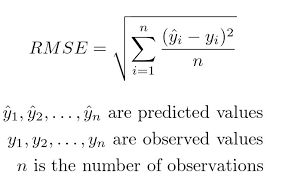

In [7]:
#the sum of squares of the differences between the actual y-values and the mean y-value
#the sum of squares of the residuals (differences between the actual y-values and the predicted y-values)

sumofsquares_sst = 0
sumofresiduals_ssr = 0

for i in range(n) :
    y_pred = b0 + b1 * X[i] #predicted value of y
    sumofsquares_sst += (Y[i] - y_mean) ** 2
    sumofresiduals_ssr += (Y[i] - y_pred) **2

r2  = 1 - (sumofresiduals_ssr/sumofsquares_sst)

print(f"R squared score: {r2}")

R squared score: 0.6393117199570003


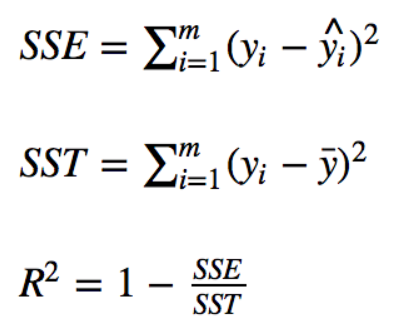